#EDA


In [62]:
import pandas as pd
import numpy as np
import datascience as ds
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
import statsmodels.api as sm


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium


In [55]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
df

<ipython-input-55-75550b9c1183>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164468,445615629,09/20/2007,12:45:00,09/20/2007,12:50:00,75.0,09/20/2007,235,DANGEROUS DRUGS,567.0,...,NaN,NaN,40.668241,-73.878378,"(40.668240917, -73.878377629)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,E
164469,856873396,08/26/2006,16:00:00,NaN,NaN,45.0,08/28/2006,121,CRIMINAL MISCHIEF & RELATED OF,269.0,...,NaN,NaN,40.831337,-73.830810,"(40.831337119, -73.830810313)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D
164470,490702519,06/23/2011,21:30:00,06/23/2011,21:45:00,63.0,06/23/2011,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,F,NaN,40.616939,-73.916976,"(40.616939499, -73.916976132)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK HISPANIC,M
164471,401782112,03/21/2011,10:30:00,03/21/2011,14:52:00,45.0,03/21/2011,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,U,NaN,40.822664,-73.821778,"(40.822663919, -73.821777915)",PATROL BORO BRONX,NaN,45-64,BLACK,F


## By Borough Bar Graph

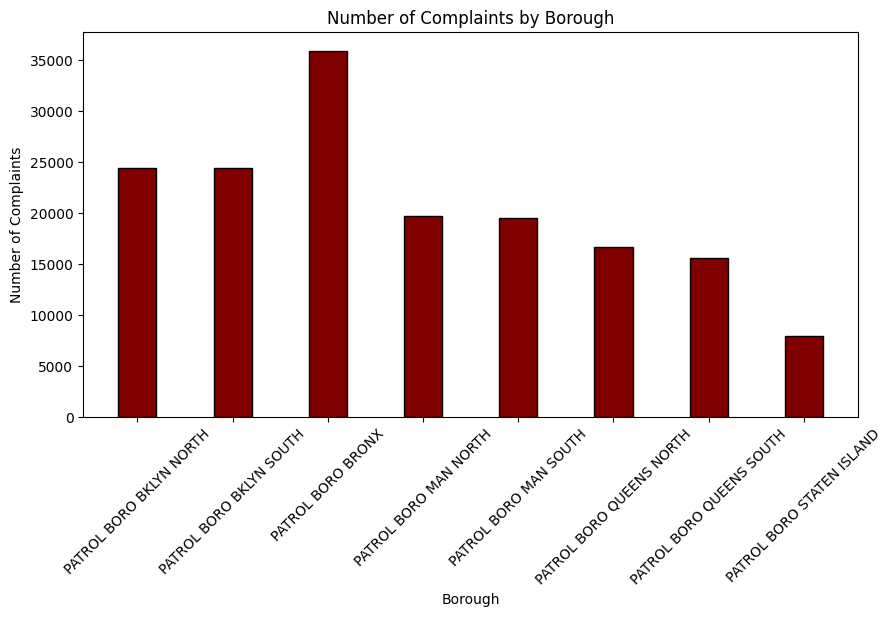

In [65]:
complaints_by_borough = df.groupby('PATROL_BORO').size().reset_index(name='Complaints')

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(complaints_by_borough['PATROL_BORO'], complaints_by_borough['Complaints'], color ='maroon',
        width = 0.4)

plt.title('Number of Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

## Heatmap

In [63]:
complaints_by_location = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Complaints')
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
heat_map = folium.plugins.HeatMap(data=complaints_by_location[['Latitude', 'Longitude', 'Complaints']].values,
                                  radius=10)
nyc_map.add_child(heat_map)
nyc_map

##Histogram of Suspect Race

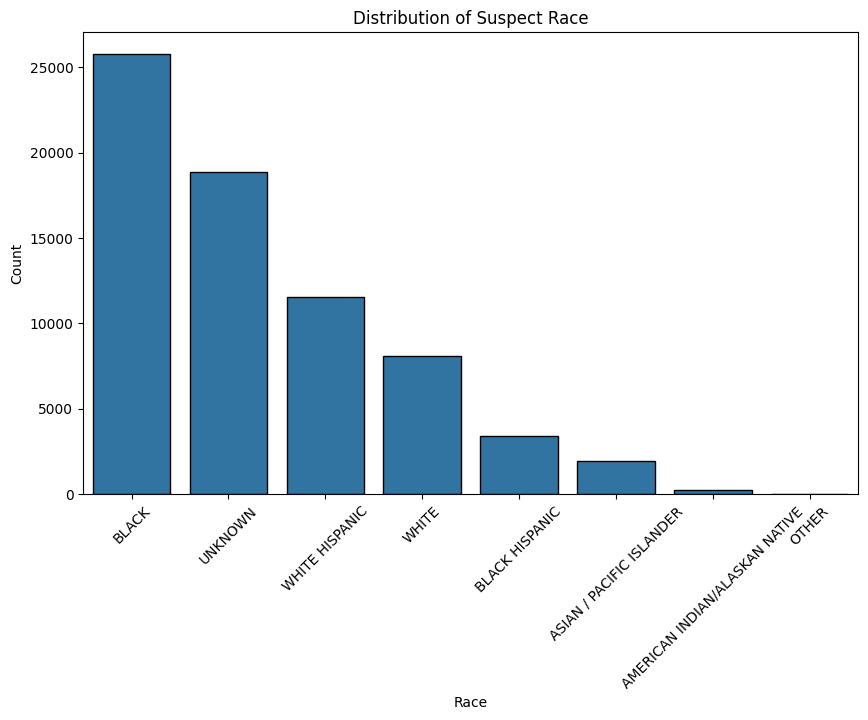

In [68]:
race_count = df['SUSP_RACE'].value_counts()
black_prop = race_count['BLACK'] / df.shape[0]
unknown_prop = race_count['UNKNOWN'] / df.shape[0]
white_his_prop = race_count['WHITE HISPANIC'] / df.shape[0]
white_prop = race_count['WHITE'] / df.shape[0]
black_his_prop = race_count['BLACK HISPANIC'] / df.shape[0]
asian_prop = race_count['ASIAN / PACIFIC ISLANDER'] / df.shape[0]
native_prop = race_count['AMERICAN INDIAN/ALASKAN NATIVE'] / df.shape[0]

#df['SUS_RACE_PROP'] = df['SUSP_RACE'] / df.shape[0]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SUSP_RACE', order=race_count.index)
plt.xticks(rotation=45)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Suspect Race')
plt.show()

##Histogram of Victim Race


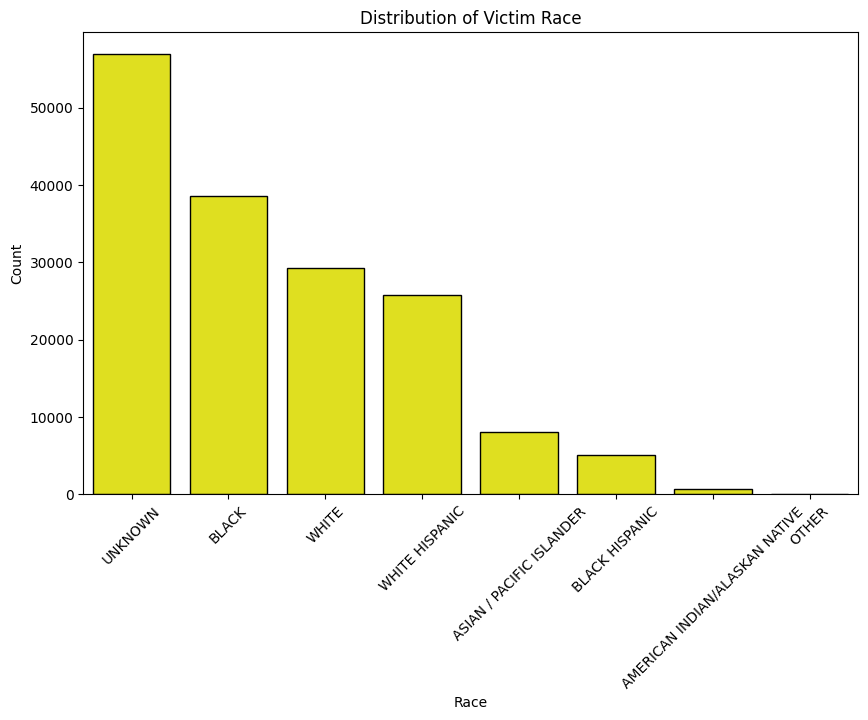

In [70]:
race_count = df['VIC_RACE'].value_counts()
black_prop = race_count['BLACK'] / df.shape[0]
unknown_prop = race_count['UNKNOWN'] / df.shape[0]
white_his_prop = race_count['WHITE HISPANIC'] / df.shape[0]
white_prop = race_count['WHITE'] / df.shape[0]
black_his_prop = race_count['BLACK HISPANIC'] / df.shape[0]
asian_prop = race_count['ASIAN / PACIFIC ISLANDER'] / df.shape[0]
native_prop = race_count['AMERICAN INDIAN/ALASKAN NATIVE'] / df.shape[0]

#df['SUS_RACE_PROP'] = df['SUSP_RACE'] / df.shape[0]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VIC_RACE', order=race_count.index, color='yellow')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Victim Race')
plt.show()

# Multiple Hypothesis Testing

#### Our research question: What is the effect of predictive policing on crime complaints in New York City?

In this notebook, we will be using multiple hypothesis testing to understand how predictive policing impacts different aspects of complaint data, such as the race and age of the complainants, severity of complaints, and more.

Lab 2 was used as a guide.


In [33]:
# Data Cleaning

df.drop(["PD_CD","JURISDICTION_CODE","HADEVELOPT","HOUSING_PSA","PATROL_BORO","STATION_NAME"],axis=1,inplace=True) #kept column "CRM_ATPT_CPTD_CD"
threshold = 0.95 * len(df)
df.dropna(axis=1, thresh=threshold, inplace = True)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
non_numeric_columns = df.select_dtypes(exclude='number').columns
df.dropna(subset=non_numeric_columns, inplace=True)
df.columns


Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'RPT_DT',
       'KY_CD', 'OFNS_DESC', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lat_Lon', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

# Hypothesis 1: Frequency of Complaints

*Null 1*: There is no significant difference in complaint levels in New York before and after the implementation of predictive policing in 2013.

*Alt:* Complaint levels in New York significantly increased after the implementation of predictive policing in 2013.

*Test statistic:* Difference in means, using a paired t-test

# EDA
Let's first look at the counts of complaints to the NYPD over the years, from 2006 to 2018.

In [11]:
df1 = df.copy()
df1['date'] = pd.to_datetime(df1['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
df1 = df1.dropna(subset=['date'])
df1['year'] = df1['date'].dt.year
df1 = df1[df1['year'] >= 2006]
by_year = df1.groupby('year').size().to_frame('counts')
by_year

,counts
year,
2006,22753
2007,23998
2008,23837
2009,22905
2010,22816
2011,19025
2012,4445
2013,4345
2014,4432


In [12]:
# Difference in means by month
# Split the data into before and after 2013, group by month

before_2013 = df1[(df1['date'].dt.year >= 2006) & (df1['date'].dt.year <= 2013)]
after_2013 = df1[df1['date'] >= '2013-01-01']

before_2013['month'] = df1['date'].dt.month
before_2013 = before_2013.groupby('month').size().reset_index()
before_2013.columns = ['month', 'count']
before_2013['mean'] = before_2013['count']/6 # 2006 to 2012

after_2013['month'] = df1['date'].dt.month
after_2013 = after_2013.groupby('month').size().reset_index()
after_2013.columns = ['month', 'count']
after_2013['mean'] = after_2013['count']/5 # 2013 to 2018
after_2013

<ipython-input-12-ef63dd12731f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_2013['month'] = df1['date'].dt.month
<ipython-input-12-ef63dd12731f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_2013['month'] = df1['date'].dt.month


,month,count,mean
0,1,1639,327.8
1,2,1568,313.6
2,3,1611,322.2
3,4,1738,347.6
4,5,1976,395.2
5,6,1876,375.2
6,7,1980,396.0
7,8,1948,389.6
8,9,1815,363.0
9,10,1861,372.2


In [13]:
before_2013

,month,count,mean
0,1,10915,1819.166667
1,2,9215,1535.833333
2,3,11416,1902.666667
3,4,11414,1902.333333
4,5,12880,2146.666667
5,6,12696,2116.000000
6,7,13428,2238.000000
7,8,13463,2243.833333
8,9,12644,2107.333333
9,10,12930,2155.000000


From the before_2013 and after_2013 tables, we can already see a large drop in complaints after 2013. However, we will conduct a paired t-test to see if it is significant. I am using the scipy.stats.ttest_rel to calculate the t-test.

In [15]:
before_2013_means = before_2013['mean']
after_2013_means = after_2013['mean']

t_statistic, p_value = ttest_rel(before_2013_means, after_2013_means)
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Paired t-test results:
T-statistic: 31.9001514462
P-value: 3.41679781069e-12


# Hypothesis 2: Victim's Sex

*Null:* Predictive policing does not have a significant effect on the proportion of victim sex before and after implementation of predictive policing.

*Alt:* There is a significant difference.

*Test statistic:* Difference in proportions, using a chi-square test.


## Attempt 1: Looking at the severity of crime
1. Assign a 'severity score' to the complaints by their crime type: 'MISDEMEANOR' = 1, 'VIOLATION' = 2, 'FELONY' = 3
2. Look at the average severity score before 2013 and after 2013, and see if there is a difference
3. Conduct a paired t-test to see if the results are significant.

In [37]:
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
df2 = df2.dropna(subset=['date'])
severity = {'MISDEMEANOR': 1, 'VIOLATION': 2, 'FELONY': 3}
df2['severity score'] = df2['LAW_CAT_CD'].map(severity)
df2.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_RACE,VIC_SEX,date,severity score
0,325341655,02/11/2015,15:00:00,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,VIOLATION OF ORDER OF PROTECTI,COMPLETED,MISDEMEANOR,...,N.Y. HOUSING POLICE,1009656.0,181287.0,40.664239,-73.908425,"(40.664239422, -73.908425011)",BLACK,M,2015-02-11,1
1,393816841,03/17/2012,10:30:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,...,N.Y. POLICE DEPT,1014035.0,174133.0,40.644590,-73.892672,"(40.644589618, -73.892672426)",BLACK,F,2012-03-17,1
2,802896158,10/27/2016,13:48:00,71.0,11/03/2016,578,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,...,N.Y. POLICE DEPT,1000222.0,179282.0,40.658758,-73.942435,"(40.658758183, -73.942434788)",BLACK,M,2016-10-27,2
3,633812343,11/27/2014,19:00:00,112.0,11/28/2014,104,RAPE,RAPE 1,COMPLETED,FELONY,...,N.Y. POLICE DEPT,1025420.0,202485.0,40.722364,-73.851474,"(40.722363687, -73.851473894)",WHITE,F,2014-11-27,3
4,300349533,12/11/2013,13:30:00,24.0,12/12/2013,109,GRAND LARCENY,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,...,N.Y. POLICE DEPT,992848.0,228356.0,40.793465,-73.968950,"(40.793464597, -73.968949638)",WHITE,F,2013-12-11,3


In [38]:
pre_2013_2 = df2[(df2['date'].dt.year >= 2006) & (df2['date'].dt.year <= 2013)]
post_2013_2 = df2[df2['date'] >= '2013-01-01']

pre_2013_2['month'] = df2['date'].dt.month
pre_2013_2 = pre_2013_2.groupby('month').agg({'severity score': 'mean'})
pre_2013_2

<ipython-input-38-7dc1c444c75d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_2013_2['month'] = df2['date'].dt.month


,severity score
month,
1,1.727348
2,1.718285
3,1.699019
4,1.706676
5,1.721196
6,1.715186
7,1.726616
8,1.729555
9,1.735843


In [39]:
post_2013_2['month'] = df2['date'].dt.month
post_2013_2 = post_2013_2.groupby('month').agg({'severity score': 'mean'})
post_2013_2

<ipython-input-39-7ba7e164b2bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2013_2['month'] = df2['date'].dt.month


,severity score
month,
1,1.724832
2,1.730867
3,1.739292
4,1.714614
5,1.744939
6,1.771855
7,1.764141
8,1.755133
9,1.754270


In [40]:
pre_2013_means_2 = pre_2013_2['severity score']
post_2013_means_2 = post_2013_2['severity score']

t_statistic, p_value = ttest_rel(pre_2013_means_2, post_2013_means_2)
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Paired t-test results:
T-statistic: -3.04812365458
P-value: 0.0110845843252


We pivoted because we realized that this hypothesis test was too similar to one of our other hypothesis tests.  

##Attempt 2: Looking at Victim's Sex

In [41]:
df5 = df.copy()
df5['date'] = pd.to_datetime(df5['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
df5 = df5.dropna(subset=['date'])
pre_2013_5 = df5[(df5['date'].dt.year >= 2006) & (df5['date'].dt.year <= 2013)]
post_2013_5 = df5[df5['date'] >= '2013-01-01']

In [43]:
# Calculate the proportions of complaints by suspect race for pre/post 2013
pre2013_sex_proportions = pre_2013_5['VIC_SEX'].value_counts(normalize=True)
post2013_sex_proportions = post_2013_5['VIC_SEX'].value_counts(normalize=True)
contingency_table = pd.concat([pre2013_sex_proportions, post2013_sex_proportions], axis=1, keys=['Pre-2013', 'Post-2013'])

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in the victim's sex before and after 2013.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the victim's sex before and after 2013.")

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

Fail to reject the null hypothesis. There is no significant difference in the victim's sex before and after 2013.
Chi-square statistic: 0.00327752564883
P-value: 0.999950144742


#Hypothesis 3: Preventative Measures on Crime

*Null:* There is no significant difference in which borough a report was made before and after predictive policing.

*Alt:* Certain boroughs experience a significant difference in reports.

*Test statistic:* Proportion of borough reports before and after predictive policing, and will use a chi-square test to test significance.


## Attempt 1: Preventative Measures on Crime


In [44]:
df3 = df.copy()
df3['CRM_ATPT_CPTD_CD'].unique()
df3['date'] = pd.to_datetime(df3['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')

In [45]:
completed = {'COMPLETED':1, 'ATTEMPTED':0}
df3['completed crime'] = df3['CRM_ATPT_CPTD_CD'].map(completed)

In [46]:
pre_2013_3 = df3[(df3['date'].dt.year >= 2006) & (df3['date'].dt.year <= 2013)]
pre_2013_3['month'] = df3['date'].dt.month
pre_2013_3 = pre_2013_3.groupby('month').agg({'completed crime': 'mean'})
pre_2013_3

<ipython-input-46-ea6c92db4794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_2013_3['month'] = df3['date'].dt.month


,completed crime
month,
1,0.981310
2,0.983288
3,0.983269
4,0.981602
5,0.983851
6,0.982908
7,0.982201
8,0.981876
9,0.983470


In [ ]:
post_2013_3 = df3[df3['date'] >= '2013-01-01']
post_2013_3['month'] = df3['date'].dt.month
post_2013_3 = pre_2013_3.groupby('month').agg({'completed crime': 'mean'})
post_2013_3

<ipython-input-16-b30427dc6596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2013_3['month'] = df3['date'].dt.month


,completed crime
month,
1.0,0.982267
2.0,0.983547
3.0,0.983234
4.0,0.983847
5.0,0.983692
6.0,0.983583
7.0,0.983522
8.0,0.982616
9.0,0.982289


In [ ]:
pre_2013_means_3 = pre_2013_3['completed crime']
post_2013_means_3 = post_2013_3['completed crime']

t_statistic, p_value = ttest_rel(pre_2013_means_3, post_2013_means_3)
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Paired t-test results:
T-statistic: nan
P-value: nan


For now, this hypothesis will be abandoned because the proportion of completed crime to attempted is already very low.

## Attempt 2: Location of Report by Borough

# Hypothesis 3: Location of Report by Borough

*Null:* There is no significant difference in which borough a report was made to before and after the implementation of predictive policing in 2013.

*Alt:* Certain boroughs experience a significant difference in reports made after the implementation of predictive policing in 2013.

*Test statistic:* Proportion of borough reports by type before and after predictive policing, using logistic regression

In [47]:
df4 = df.copy()
df4['date'] = pd.to_datetime(df4['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')

pre_2013_4 = df4[(df4['date'].dt.year >= 2006) & (df4['date'].dt.year < 2013)]
post_2013_4 = df4[df4['date'] >= '2013-01-01']
#Create a binary column for pre and post 2013
df4['pre2013'] = (df4['date'].dt.year < 2013).astype(int)
df4 = df4.dropna(subset=['date', 'BORO_NM'])

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

OHE_boro = pd.get_dummies(df4['BORO_NM'])
OHE_boro['pre2013'] = df4['pre2013']

X, y = OHE_boro.drop(columns=['pre2013']), OHE_boro['pre2013']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix to evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.871641237878
Confusion Matrix:
[[    0  4156]
 [    0 28222]]


In [49]:
#Some light EDA
# Calculate the proportions of reports made by borough for each period
pre2013_borough_proportions = pre_2013_4['BORO_NM'].value_counts(normalize=True)
post2013_borough_proportions = post_2013_4['BORO_NM'].value_counts(normalize=True)
print(pre2013_borough_proportions)
print(post2013_borough_proportions)

BORO_NM
BROOKLYN         0.297963
MANHATTAN        0.239349
BRONX            0.217422
QUEENS           0.195952
STATEN ISLAND    0.049314
Name: proportion, dtype: float64
BORO_NM
BROOKLYN         0.295742
MANHATTAN        0.235628
BRONX            0.225640
QUEENS           0.197271
STATEN ISLAND    0.045719
Name: proportion, dtype: float64


In [50]:
OHE_boro = pd.get_dummies(df4['BORO_NM'])
X, y = OHE_boro, df4['pre2013']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_array = X_train.values.astype(float)
y_train_array = y_train.values.astype(float)

# Fit the model
logit_model = sm.Logit(y_train_array, sm.add_constant(X_train_array))
logit_result = logit_model.fit()

p_values = logit_result.pvalues
print("P-values for each coefficient:")
print(p_values)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Optimization terminated successfully.
         Current function value: 0.391217
         Iterations 9
P-values for each coefficient:
[ 0.99999179  0.99999859  0.99999837  0.99999832  0.99999847  0.99999805]
Confusion Matrix:
[[    0  4156]
 [    0 28222]]


High p-values tell us that these results are not statistically significant. It means that these results are highly likely to happen under the null. This suggests that the type of borough does not have a significant effect on whether it came from before 2013 or after. Having one feature is too little. We will pivot to Chi-square test instead.

In [51]:
df4 = df.copy()
df4['date'] = pd.to_datetime(df4['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')

before_2013 = df4[df4['date'].dt.year < 2013]
after_2013 = df4[df4['date'].dt.year >= 2013]

# observed frequencies
before_2013_counts = before_2013['BORO_NM'].value_counts(normalize=True)
after_2013_counts = after_2013['BORO_NM'].value_counts(normalize=True)

# contingency table
contingency_table = pd.concat([before_2013_counts, after_2013_counts], axis=1, keys=['Before_2013', 'After_2013']).fillna(0)

chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in the proportions of reports made to boroughs before and after 2013.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the proportions of reports made to boroughs before and after 2013.")


Chi-square statistic: 0.000338303959893
P-value: 0.999999985695
Fail to reject the null hypothesis. There is no statistically significant difference in the proportions of reports made to boroughs before and after 2013.
